In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [45]:
df=pd.read_csv(os.path.abspath('../PRE_PROCESS_DATA/Project data set'))
df.drop(df.columns[[0]],axis=1,inplace=True)
a = df.loc[:,['Degré.jour', 'Année','Émissions globales CO2']].dropna()
stat.pearsonr(a['Degré.jour'],a['Émissions globales CO2'])

(0.5479831104097096, 0.0067901032945639388)

<IPython.core.display.Javascript object>


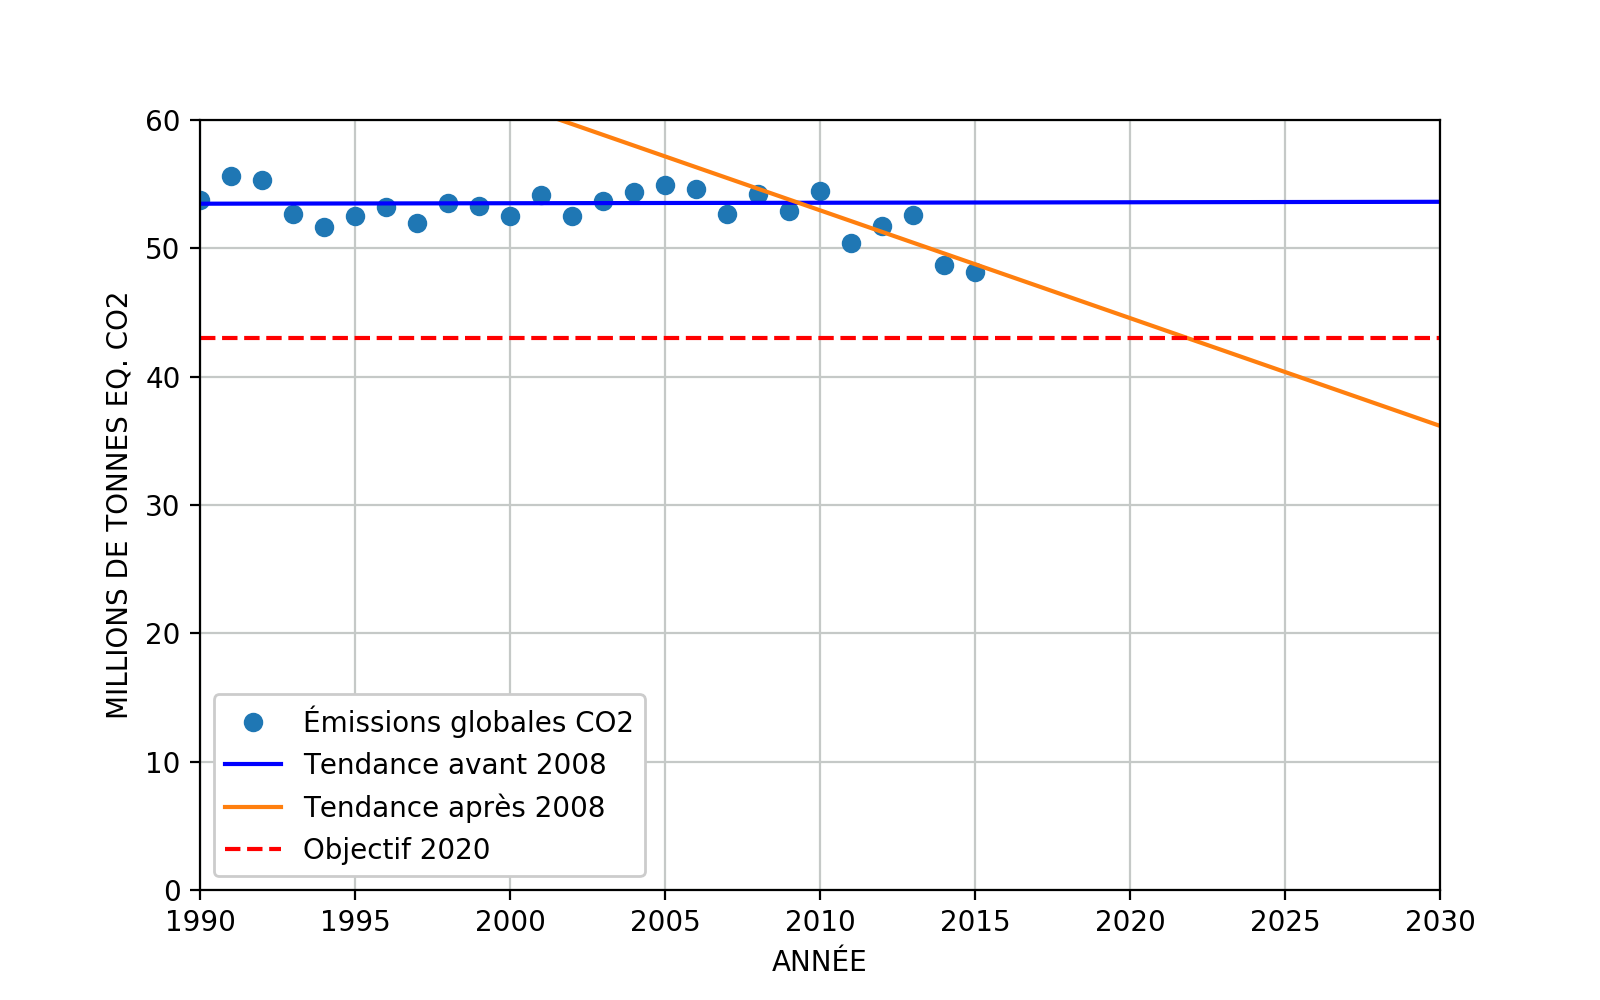

In [3]:
df_CO2=df.loc[:,['Année','Émissions globales CO2', 'Degré.jour']]
df_CO2.dropna(inplace=True)
%matplotlib notebook
plt.figure('Évolution globale CO2',figsize=(8,5))
plt.plot(df_CO2['Année'],df_CO2['Émissions globales CO2']/df_CO2[df_CO2['Année']>1992]['Degré.jour'],'o')

df_CO2_1990=df_CO2[df_CO2['Année']<2008]
fitCO2g=np.polyfit(df_CO2_1990['Année'],df_CO2_1990['Émissions globales CO2'],1)
reg1=np.poly1d(fitCO2g)
x1=range(1993,2031)
y1=reg1(x1)
plt.plot(x1,y1,'b',label="Tendance avant 2008")                 # Régression linéaire avant 2008

df_CO2_2008=df_CO2[df_CO2['Année']>2008]
fitCO2_2008=np.polyfit(df_CO2_2008['Année'],df_CO2_2008['Émissions globales CO2'],1)
reg2=np.poly1d(fitCO2_2008)
x2=range(2000,2031)
y2=reg2(x2)
plt.plot(x2,y2,label="Tendance après 2008")                 # Régression linéaire depuis taxe CO2 de 2008

y3=[0]*41
for a in range (0,41):
    y3[a]=53.755302*0.8
i=0
x3=[0]*41
for b in range (1990,2031):
    x3[i]=b
    i+=1
    
plt.plot(x3,y3,'--',color="red",label="Objectif 2020")            # Objectif 2020 (80% du niveau 1990)
plt.grid(color='xkcd:silver')
plt.axis([1990,2030,0,60])
plt.xlabel('ANNÉE')
plt.ylabel('MILLIONS DE TONNES EQ. CO2')
plt.legend(framealpha= 1)

<IPython.core.display.Javascript object>


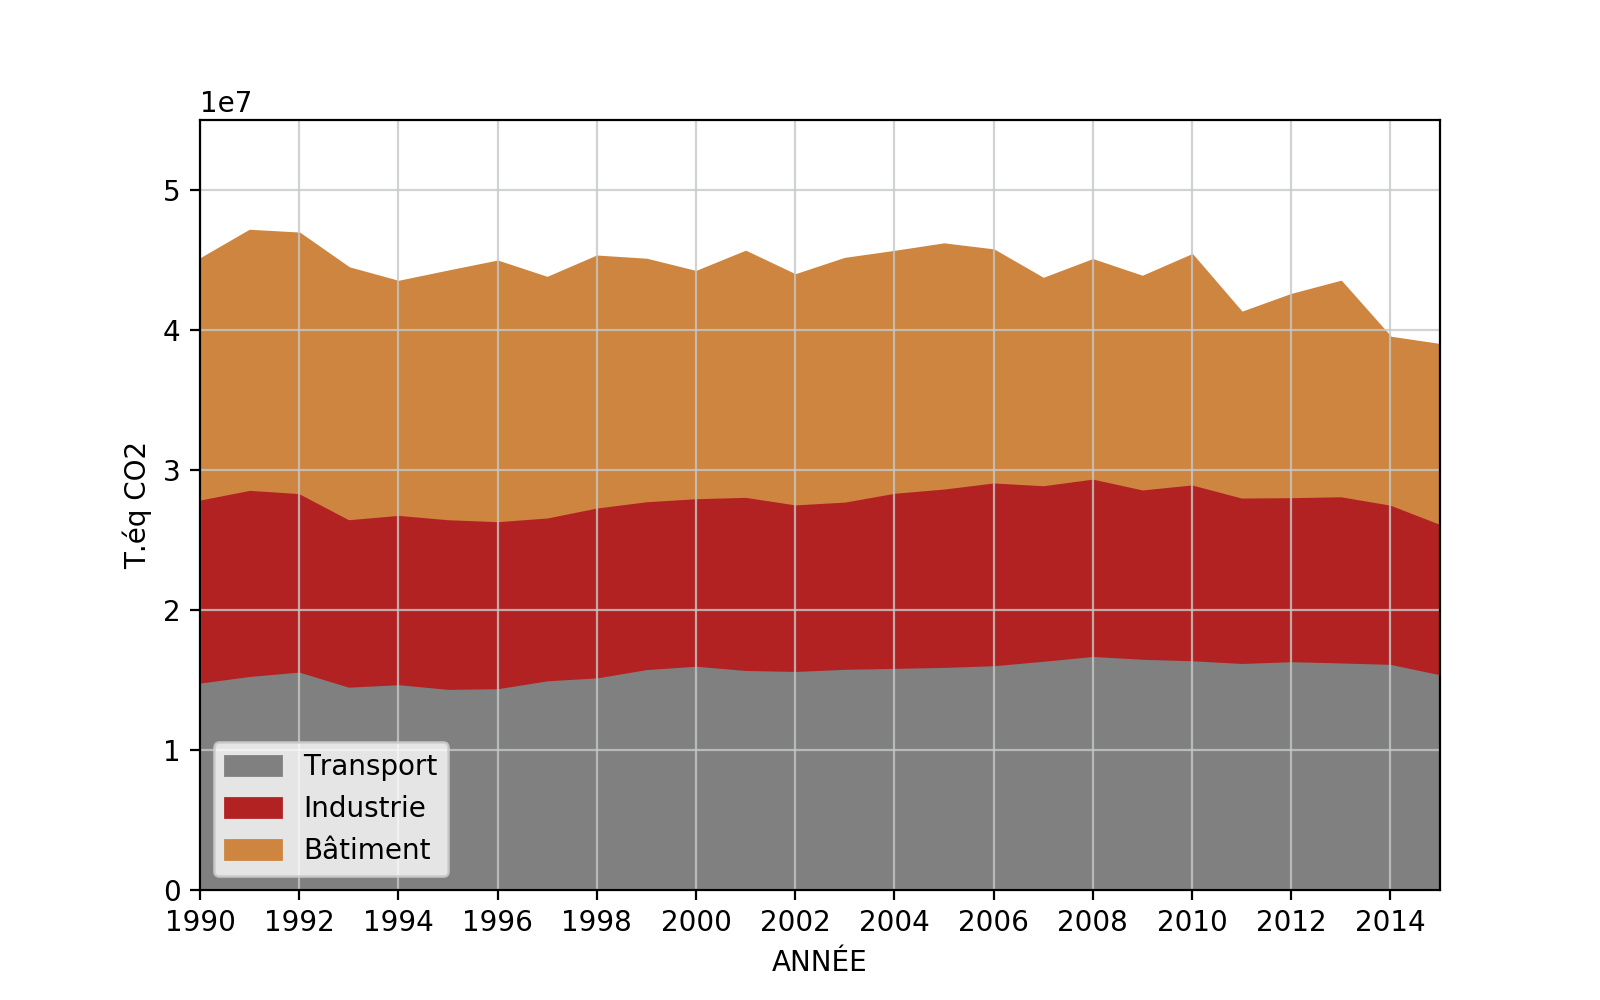

In [4]:
plt.figure('Évolution des émissions de CO2/hab par poste de consommation',figsize=(8,5))
plt.fill_between(df['Année'],0,1e6*df['Émissions CO2 transport (en millions de T équivalents)'],label='Transport',color='gray')
plt.fill_between(df['Année'],1e6*df['Émissions CO2 transport (en millions de T équivalents)'],1e6*(df['Émissions CO2 transport (en millions de T équivalents)']+df['Émissions CO2 industrie (en millions de T équivalents)']),label='Industrie',color='firebrick')
plt.fill_between(df['Année'],1e6*(df['Émissions CO2 transport (en millions de T équivalents)']+df['Émissions CO2 industrie (en millions de T équivalents)']),1e6*(df['Émissions CO2 transport (en millions de T équivalents)']+df['Émissions CO2 industrie (en millions de T équivalents)']+df['Émissions CO2 bâtiment (en millions de T équivalents)']),label='Bâtiment',color='peru')

plt.legend(loc=3)
plt.grid(color='xkcd:silver', alpha= 0.8)
plt.xticks(np.arange(1990, 2016, step=2))
plt.axis([1990,2015,0,5.5e7])
plt.xlabel('ANNÉE')
plt.ylabel('T.éq CO2')

<IPython.core.display.Javascript object>


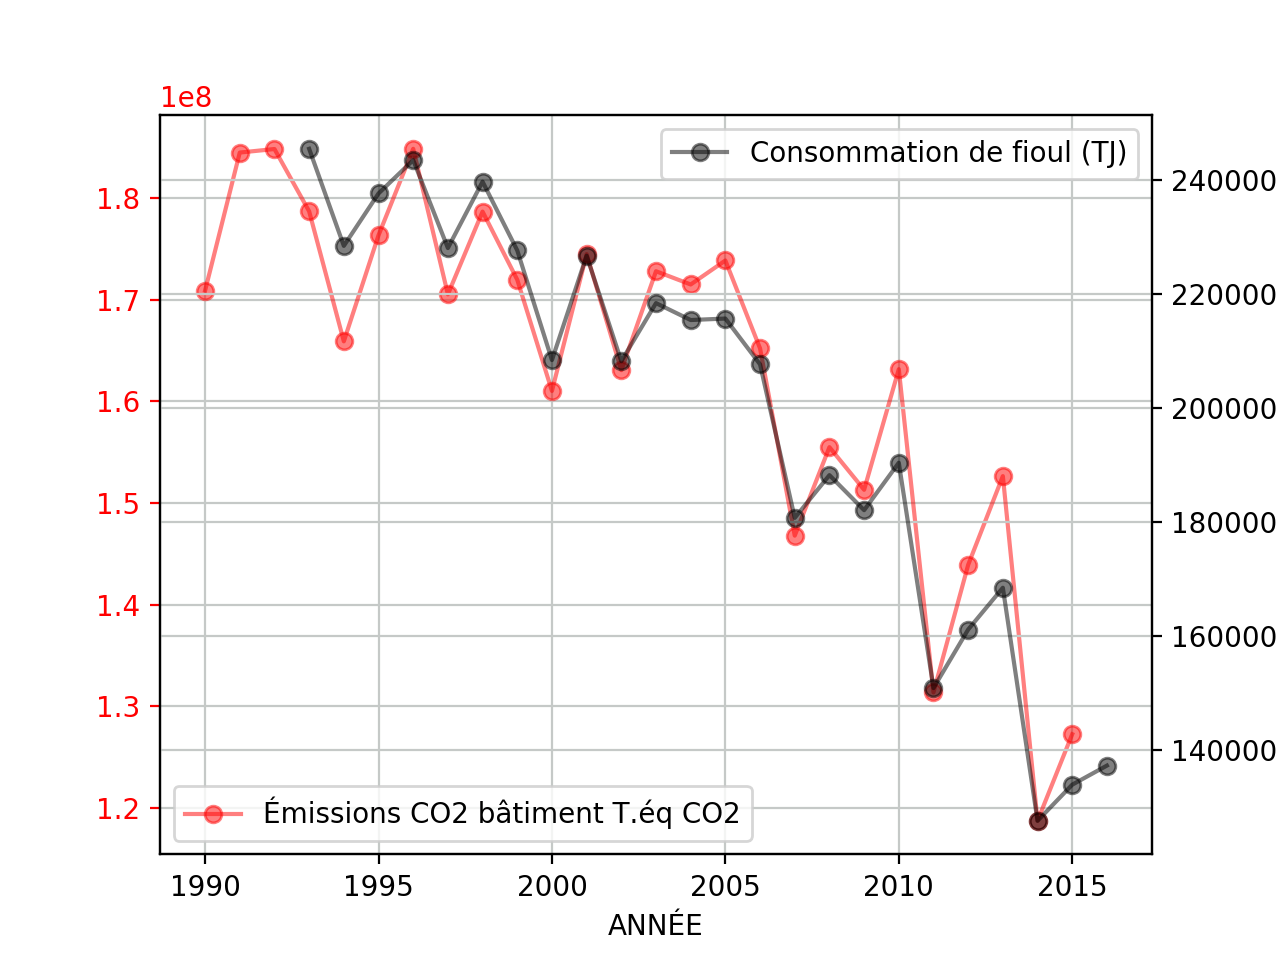

In [5]:
fig, ax1=plt.subplots()

ax1.plot(df['Année'],10e6*df['Émissions CO2 bâtiment (en millions de T équivalents)'],'-o',color='r',label='Émissions CO2 bâtiment T.éq CO2',alpha=0.5)
ax1.tick_params(axis='y',colors='red')
plt.grid(color='xkcd:silver')
plt.xlabel('ANNÉE')

ax2=ax1.twinx()
ax2.plot(df['Année'],df['Combustibles pétroliers (TJ)'],'-o',color='black',label='Consommation de fioul (TJ)',alpha=0.5)
ax2.tick_params(axis='y',colors='black')
plt.grid(color='xkcd:silver')
ax1.legend(loc=3)
ax2.legend()


#il y a clairement corrélation entre la consommation de fioul des bâtiments suisses et les émissions de CO2 de ce secteur.

<IPython.core.display.Javascript object>


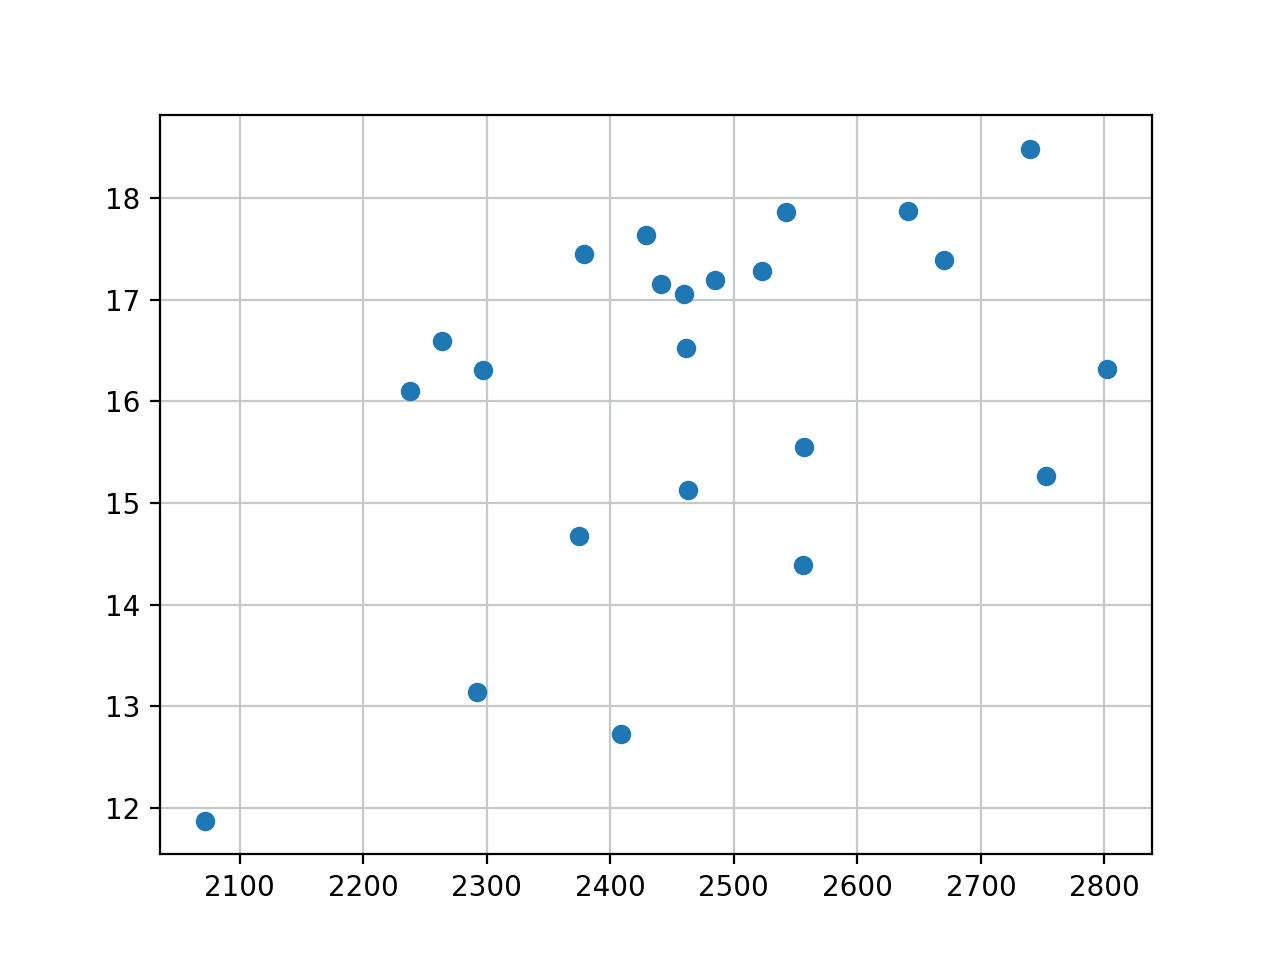

In [48]:
dX=df.loc[:,["Degré.jour","Combustibles pétroliers (TJ)","Émissions CO2 bâtiment (en millions de T équivalents)"]]
dX.dropna(inplace=True)
X1=a['Degré.jour']
Y1=dX["Émissions CO2 bâtiment (en millions de T équivalents)"]
plt.figure('Étude de corrélation fioul/CO2 bâtiment')
plt.plot(X1,Y1,'o')
#plt.axis([40,110,0,0.01])
plt.grid(color='xkcd:silver')

#liaison linéaire positive entre ces deux variables

In [49]:
# Calcul du coefficient de Pearson

from scipy import stats as stat
stat.pearsonr(X1,Y1)


(0.47205962760808134, 0.022948221952176114)

<IPython.core.display.Javascript object>


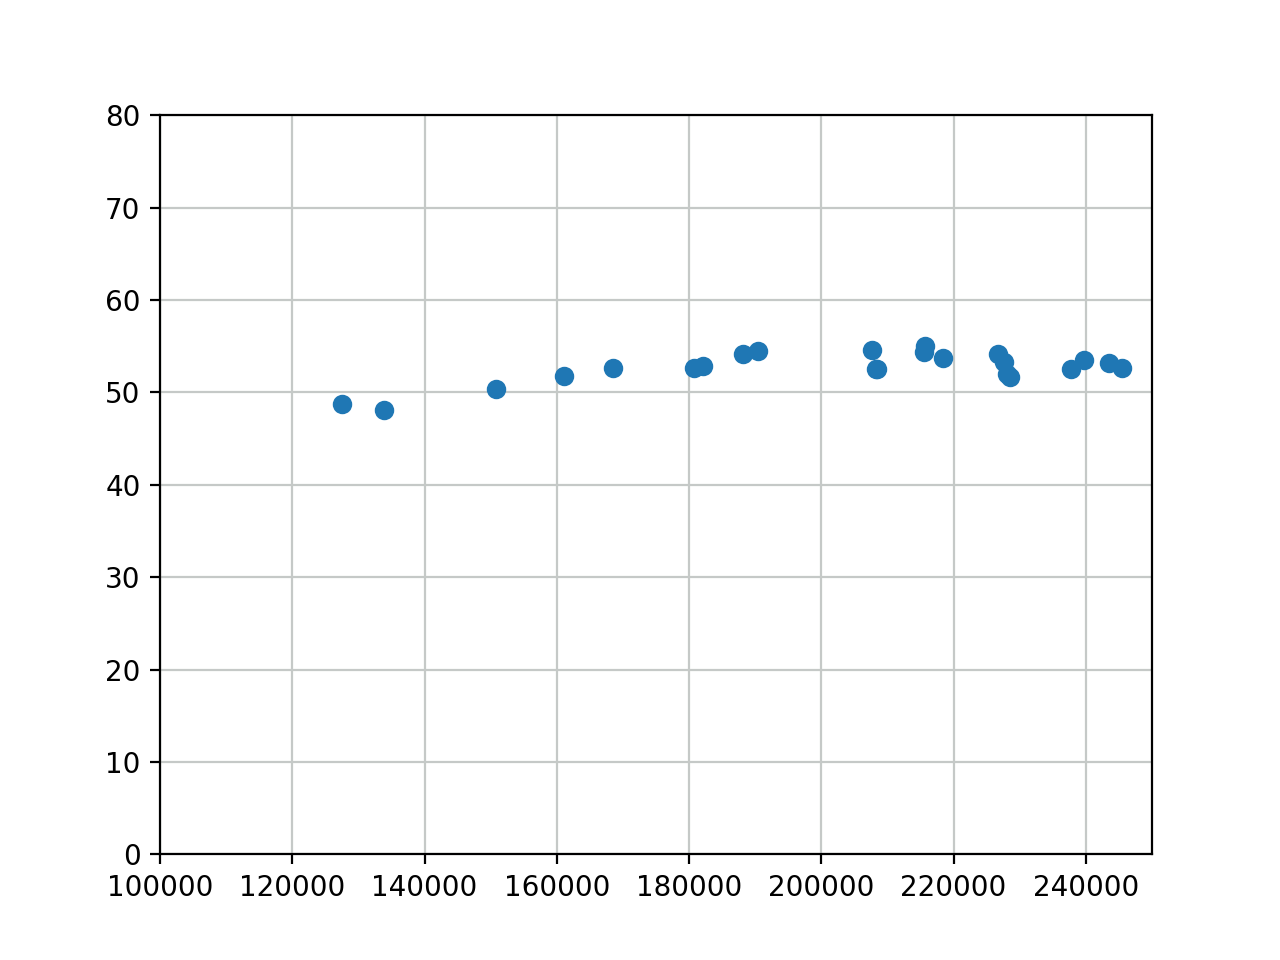

In [8]:
dX2=df.loc[:,["Combustibles pétroliers (TJ)",'Émissions globales CO2']]
dX2.dropna(inplace=True)
Y2=dX2['Émissions globales CO2']
plt.figure('Corrélation fioul/CO2 global')
plt.plot(X1,Y2,'o')
plt.axis([100000,250000,0,80])
plt.grid(color='xkcd:silver')

In [9]:
stat.pearsonr(X1,Y2)

(0.64367422858967427, 0.00091994769674569798)

<IPython.core.display.Javascript object>


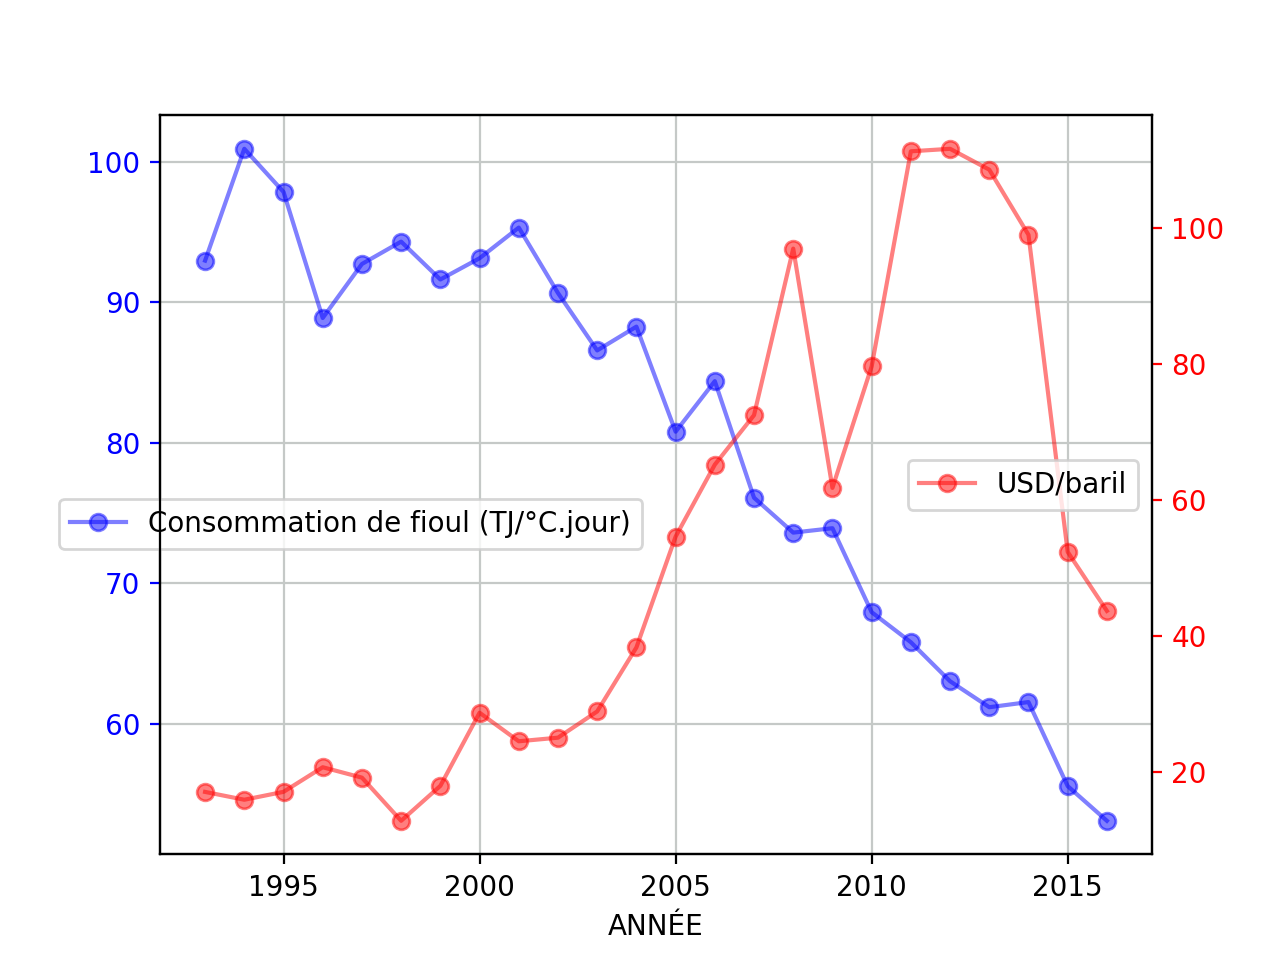

<IPython.core.display.Javascript object>


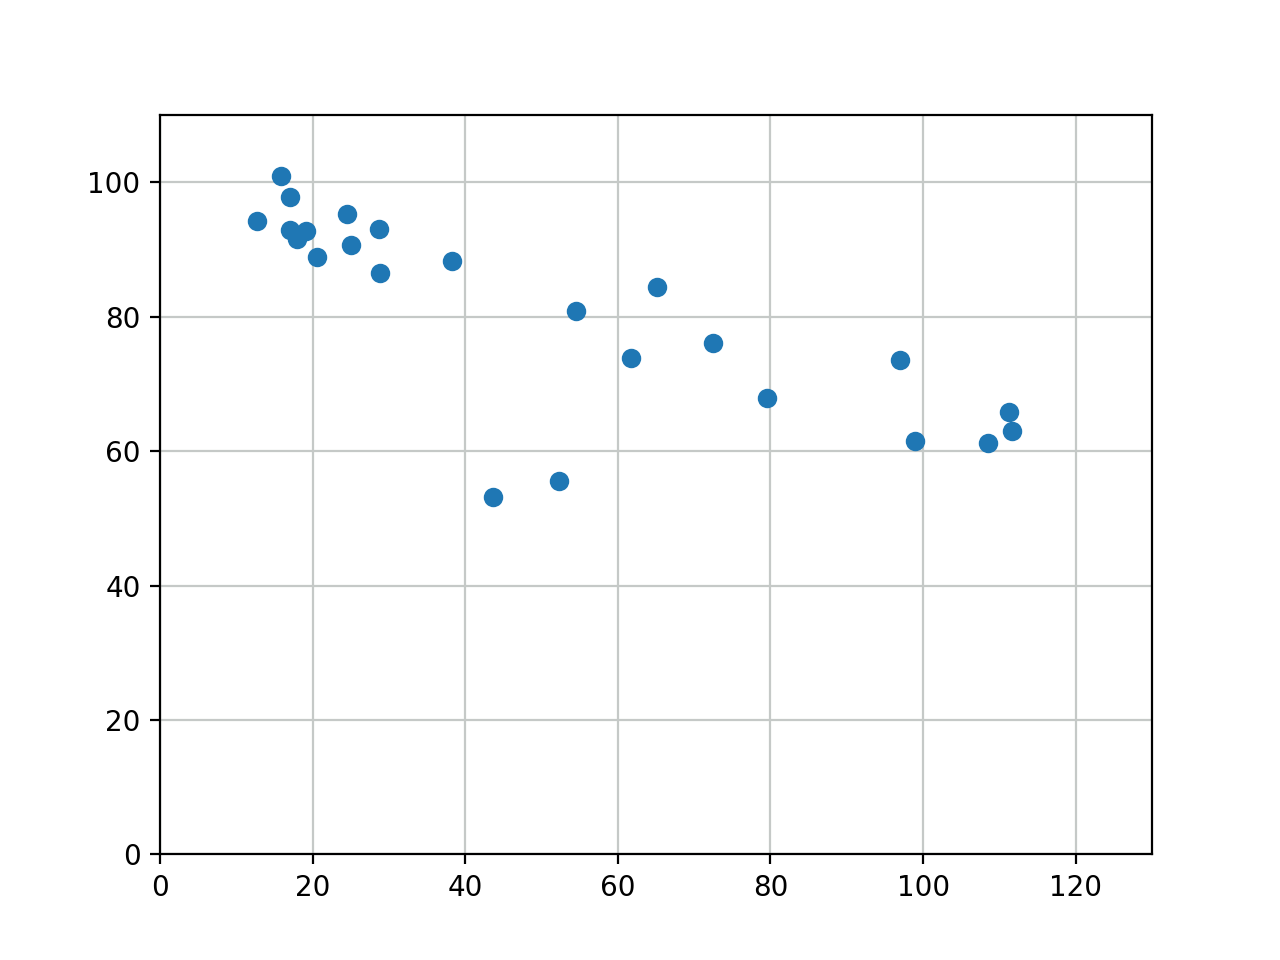

In [10]:
dX3=df.loc[:,["Année","Combustibles pétroliers (TJ)",'USD par baril','Degré.jour']]
dX3.dropna(inplace=True)

#   Corrélation consommation de fioul avec l'inverse du prix du baril

fig, ax1=plt.subplots()

X3=dX3['USD par baril']
Y3=dX3["Combustibles pétroliers (TJ)"]/dX3['Degré.jour']

ax1.plot(dX3['Année'],dX3["Combustibles pétroliers (TJ)"]/dX3['Degré.jour'],'-o',color='blue',alpha=0.5,label='Consommation de fioul (TJ/°C.jour)')
ax1.tick_params(axis='y',colors='blue')
plt.legend(bbox_to_anchor=[0.5,0.5],loc='best')
plt.xlabel('ANNÉE')

plt.grid(color='xkcd:silver')

ax2=ax1.twinx()
ax2.plot(dX3['Année'],dX3['USD par baril'],'-o',alpha=0.5,color='red',label='USD/baril')
ax2.tick_params(axis='y',colors='red')
plt.legend(loc=7)

plt.figure('Corrélation')

plt.plot(X3,Y3,'o')
plt.axis([0,130,0,110])
plt.grid(color='xkcd:silver')

In [11]:
stat.pearsonr(X3,Y3)

(-0.78121906291762211, 6.6083503721447021e-06)

In [12]:
CO2_EMISSIONS = pd.DataFrame({        #kgCO2/kWh
    
    'coal': [0.440],
    'oil': [0.301],
    'gas': [0.228],
    'direct_elec': [0.078],
    'heating_pump': [0.050],
    'thermal': [0.030],
    'wood': [0.027]
})

In [13]:
CO2_EMISSIONS.sum(axis=1)

0    1.154
dtype: float64

In [14]:
em_bat = df[df['Année']>1999]['Émissions CO2 bâtiment (en millions de T équivalents)'].dropna()

In [15]:
len(em_bat)

16

In [16]:
CityConsump = pd.read_excel(os.path.join('../RAW_DATA/data_educative_app.xlsx'))
CityConsump = CityConsump[CityConsump['Secteur']=='Chauffage et autres'].loc[:,['Agent Énergétique', 'Année', 'Consommation (TJ)']]
CityConsump = CityConsump[CityConsump['Consommation (TJ)']!=0]
CityConsump.reset_index(drop=True, inplace=True)

CoalCons = CityConsump[CityConsump['Agent Énergétique']=='Charbon']['Consommation (TJ)']
CoalCons.reset_index(drop=True, inplace=True)

OilCons =CityConsump[CityConsump['Agent Énergétique']=='Huile de chauffage extra-légère']['Consommation (TJ)']
OilCons.reset_index(drop=True, inplace=True)

GasCons  = CityConsump[CityConsump['Agent Énergétique']=='Gaz naturel']['Consommation (TJ)']
GasCons.reset_index(drop=True, inplace=True)

ElecCons  = CityConsump[CityConsump['Agent Énergétique']=='Electricité']['Consommation (TJ)']
ElecCons.reset_index(drop=True, inplace=True)


# Répartition de la consommation suisse d'électricité liée au Chauffage entre PAC et élec directe

HeatPumpCons = 0.25*ElecCons
DirectElecCons = 0.75*ElecCons

DhCons  = CityConsump[CityConsump['Agent Énergétique']=='Chaleur à distance']['Consommation (TJ)']
DhCons.reset_index(drop=True, inplace=True)

WoodCons  = CityConsump[CityConsump['Agent Énergétique']=='Bois et charbon de bois']['Consommation (TJ)']
WoodCons.reset_index(drop=True, inplace=True)

TherCons  = CityConsump[CityConsump['Agent Énergétique']=='Géothermie, chaleur ambiante et énergie solaire thermique']['Consommation (TJ)']
TherCons.reset_index(drop=True, inplace=True)

TotCons = CityConsump[CityConsump['Agent Énergétique']=='Tous les agents énergétiques']['Consommation (TJ)']
TotCons.reset_index(drop=True, inplace=True)

In [17]:
OldEnerMix = pd.DataFrame({
    
    'year' : [2000],
    'coal' : CoalCons.iloc[0]/TotCons.iloc[0],
    'oil' : OilCons.iloc[0]/TotCons.iloc[0],
    'gas' : GasCons.iloc[0]/TotCons.iloc[0],
    'direct_elec' : DirectElecCons.iloc[0]/TotCons.iloc[0],
    'heating_pump' : HeatPumpCons.iloc[0]/TotCons.iloc[0],
    'wood' : WoodCons.iloc[0]/TotCons.iloc[0],
    'thermal' : TherCons.iloc[0]/TotCons.iloc[0]

})

In [18]:
for i, ii in zip(range(2001, 2016), range(1, 16)):
    
    EnerMix = pd.DataFrame({
        
        'year' : [i],
        'coal' : CoalCons.iloc[ii]/TotCons.iloc[ii],
        'oil' : OilCons.iloc[ii]/TotCons.iloc[ii],
        'gas' : GasCons.iloc[ii]/TotCons.iloc[ii],
        'direct_elec' : DirectElecCons.iloc[ii]/TotCons.iloc[ii],
        'heating_pump' : HeatPumpCons.iloc[ii]/TotCons.iloc[ii],
        'wood' : WoodCons.iloc[ii]/TotCons.iloc[ii],
        'thermal' : TherCons.iloc[ii]/TotCons.iloc[ii]
    })
    
    OldEnerMix = OldEnerMix.append(EnerMix)

In [19]:
OldEnerMix.reset_index(drop=True, inplace=True)

In [20]:
x=df[df['Année']>1999]['Émissions CO2 bâtiment (en millions de T équivalents)']
x.reset_index(drop=True, inplace=True)

CO2_mix = pd.DataFrame({
    
    'year': [0],
    'coal' : [0],
    'oil' : [0],
    'gas' : [0],
    'direct_elec' : [0],
    'heating_pump' : [0],
    'wood' : [0],
    'thermal' : [0]
    
})

In [21]:
for ii in range(16):
    
    fuckoff = pd.DataFrame({
        
        'year': 2000+ii,
        'coal': [0.381*OldEnerMix['coal'][ii]*x[ii]],
        'oil': [0.26*OldEnerMix['oil'][ii]*x[ii]],
        'gas': [0.197*OldEnerMix['gas'][ii]*x[ii]],
        'direct_elec': [0.068*OldEnerMix['direct_elec'][ii]*x[ii]],
        'heating_pump': [0.043*OldEnerMix['heating_pump'][ii]*x[ii]],
        'wood': [0.0234*OldEnerMix['wood'][ii]*x[ii]],
        'thermal': [0.026*OldEnerMix['thermal'][ii]*x[ii]]
    })
    
    CO2_mix = CO2_mix.append(fuckoff)
    

In [22]:
df = CO2_mix[CO2_mix['year']!=0]

<IPython.core.display.Javascript object>


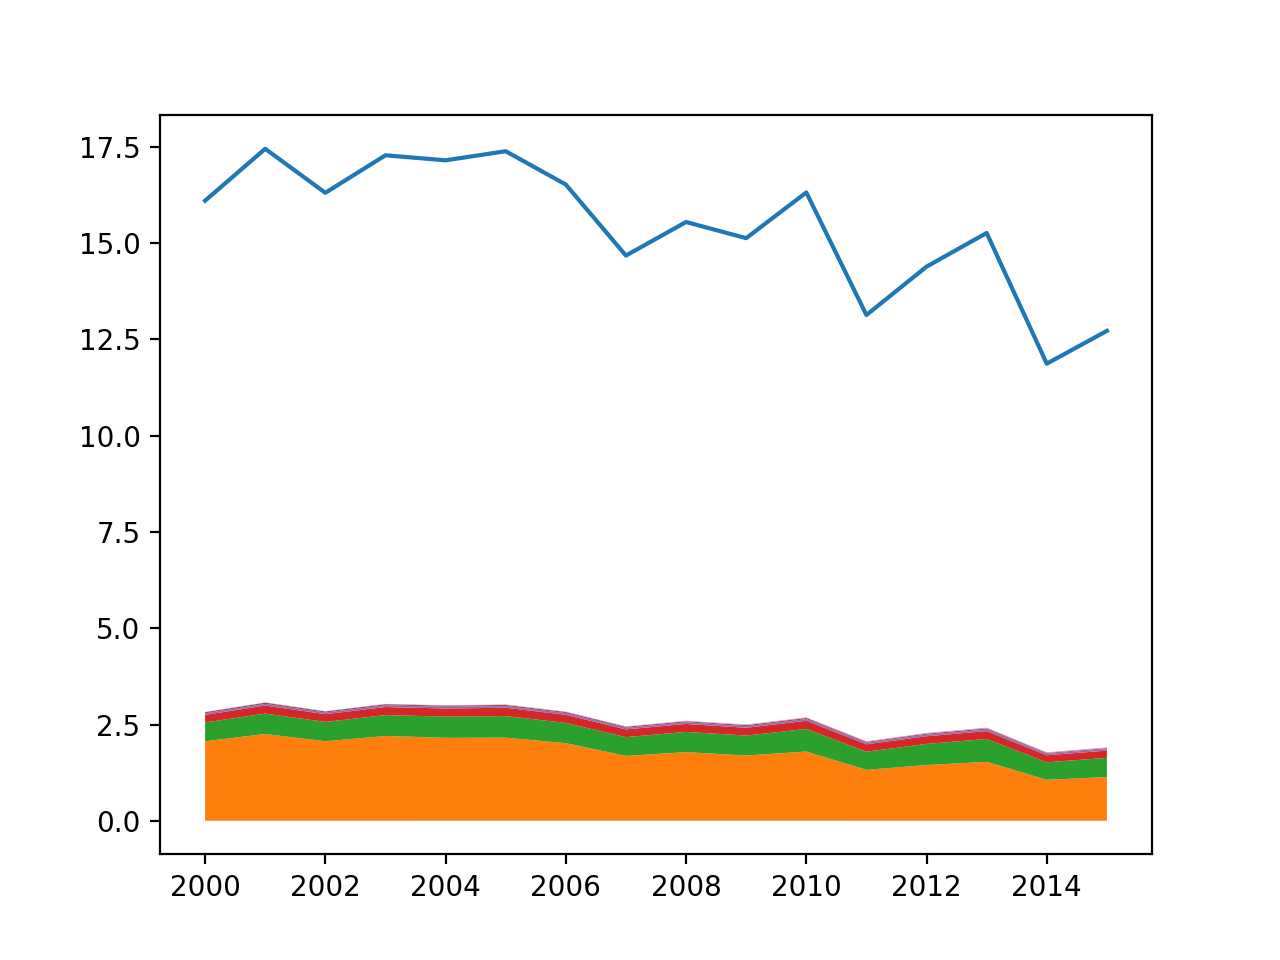

In [23]:
plt.figure('Émissions par agent énergétique')
plt.fill_between(range(2000, 2016), 0, df['coal'])
plt.fill_between(range(2000, 2016), df['coal'], df['coal']+df['oil'])
plt.fill_between(range(2000, 2016), df['coal']+df['oil'], df['coal']+df['oil']+df['gas'])
plt.fill_between(range(2000, 2016), df['coal']+df['oil']+df['gas'], df['coal']+df['oil']+df['gas']+df['direct_elec'])
plt.fill_between(range(2000, 2016), df['coal']+df['oil']+df['gas']+df['direct_elec'], df['coal']+df['oil']+df['gas']+df['direct_elec']+df['heating_pump'])
plt.fill_between(range(2000, 2016), df['coal']+df['oil']+df['gas']+df['direct_elec']+df['heating_pump'], df['coal']+df['oil']+df['gas']+df['direct_elec']+df['heating_pump']+df['wood'])
plt.fill_between(range(2000, 2016), df['coal']+df['oil']+df['gas']+df['direct_elec']+df['heating_pump']+df['wood'], df['coal']+df['oil']+df['gas']+df['direct_elec']+df['heating_pump']+df['wood']+df['thermal'])
plt.plot(range(2000, 2017), x)

In [24]:
x

0     16.103315
1     17.450939
2     16.308169
3     17.282354
4     17.151890
5     17.388134
6     16.522456
7     14.678611
8     15.549789
9     15.130389
10    16.317711
11    13.134948
12    14.390804
13    15.264948
14    11.870562
15    12.723153
16          NaN
Name: Émissions CO2 bâtiment (en millions de T équivalents), dtype: float64

In [25]:
OldEnerMix

,coal,direct_elec,gas,heating_pump,oil,thermal,wood,year
0,0.000550,0.179785,0.154203,0.059928,0.492395,0.016284,0.075831,2000
1,0.000526,0.175573,0.153998,0.058524,0.496102,0.016904,0.076878,2001
2,0.000538,0.181882,0.156224,0.060627,0.486375,0.017776,0.074349,2002
3,0.000513,0.177689,0.159113,0.059230,0.489567,0.018566,0.075018,2003
4,0.001566,0.180894,0.163101,0.060298,0.480826,0.019372,0.073133,2004
5,0.001532,0.182296,0.163927,0.060765,0.475132,0.021011,0.073976,2005
6,0.001571,0.187767,0.161387,0.062589,0.467054,0.022535,0.074840,2006
7,0.001710,0.201690,0.168116,0.067230,0.439226,0.026534,0.073626,2007
8,0.001614,0.194973,0.171692,0.064991,0.438673,0.029747,0.075496,2008
9,0.001628,0.196928,0.173526,0.065643,0.428609,0.033313,0.076729,2009


In [26]:
CO2_emissions = {

    'coal': 0.450/3.6e3,
    'oil': 0.301/3.6e3,
    'gas': 0.228/3.6e3,
    'direct_elec': 0.078/3.6e3,
    'heating_pump': 0.078/3.6e3,
    'wood': 0.050/3.6e3,
    'thermal': 0.030/3.6e3
}

In [27]:
CO2_mix = pd.DataFrame({
    
    'coal': OldEnerMix['coal']*CO2_emissions['coal'],
    'oil': OldEnerMix['oil']*CO2_emissions['oil'],
    'gas': OldEnerMix['gas']*CO2_emissions['gas'],
    'direct_elec': OldEnerMix['direct_elec']*CO2_emissions['direct_elec'],
    'heating_pump': OldEnerMix['heating_pump']*CO2_emissions['heating_pump'],
    'wood': OldEnerMix['wood']*CO2_emissions['wood'],
    'thermal': OldEnerMix['thermal']*CO2_emissions['thermal']
    
})

In [28]:
CO2_mix

,coal,direct_elec,gas,heating_pump,oil,thermal,wood
0,6.880285e-08,0.000004,0.000010,0.000001,0.000041,1.357002e-07,0.000001
1,6.571622e-08,0.000004,0.000010,0.000001,0.000041,1.408661e-07,0.000001
2,6.719555e-08,0.000004,0.000010,0.000001,0.000041,1.481352e-07,0.000001
3,6.412647e-08,0.000004,0.000010,0.000001,0.000041,1.547156e-07,0.000001
4,1.957521e-07,0.000004,0.000010,0.000001,0.000040,1.614336e-07,0.000001
5,1.915486e-07,0.000004,0.000010,0.000001,0.000040,1.750889e-07,0.000001
6,1.964307e-07,0.000004,0.000010,0.000001,0.000039,1.877932e-07,0.000001
7,2.137798e-07,0.000004,0.000011,0.000001,0.000037,2.211207e-07,0.000001
8,2.017536e-07,0.000004,0.000011,0.000001,0.000037,2.478900e-07,0.000001
9,2.035263e-07,0.000004,0.000011,0.000001,0.000036,2.776107e-07,0.000001
